In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

##### --- Generate Normal Data ---


In [4]:
# Create two distinct clusters of normal data
n_samples_normal = 200
X_normal, y_normal = make_blobs(n_samples=n_samples_normal, 
                                centers=2, 
                                cluster_std=1.2, 
                                random_state=42)

##### --- Generate Anomaly Data ---


In [7]:
# Create a small number of outliers, scattered far away
n_samples_anomalies = 20
rng = np.random.RandomState(42)
X_anomalies = rng.uniform(low=-15, high=15, size=(n_samples_anomalies, 2))


In [9]:
# --- Combine Data ---
X = np.vstack([X_normal, X_anomalies])

In [11]:
# Create a DataFrame for easier handling
df = pd.DataFrame(X, columns=['feature1', 'feature2'])

print(f"Total samples: {len(df)}")
print(f"Normal samples: {n_samples_normal}")
print(f"Anomalous samples: {n_samples_anomalies}")

Total samples: 220
Normal samples: 200
Anomalous samples: 20


##### Visualize the Synthetic Data

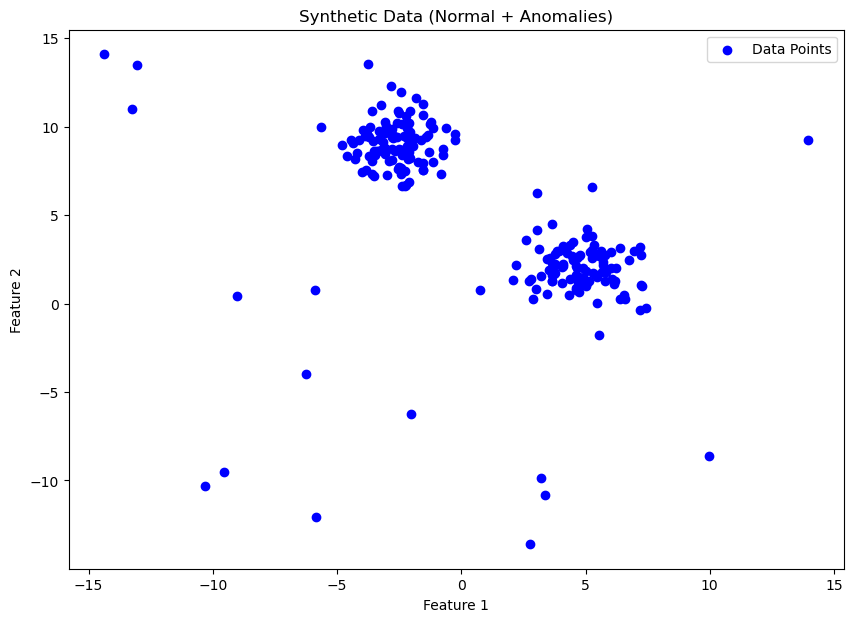

In [14]:
# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(df['feature1'], df['feature2'], c='blue', label='Data Points')
plt.title('Synthetic Data (Normal + Anomalies)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

##### Build and Train the Isolation Forest Mode

In [17]:
# Calculate the contamination (proportion of anomalies)
contamination_rate = n_samples_anomalies / len(df)
print(f"Contamination Rate: {contamination_rate:.4f}")


Contamination Rate: 0.0909


In [19]:
# Initialize the Isolation Forest model
# We set contamination to our known rate
model = IsolationForest(n_estimators=100, 
                        contamination=contamination_rate, 
                        random_state=42)

# Train the model
model.fit(X)

print("Isolation Forest model trained.")

Isolation Forest model trained.


##### Make Predictions

In [22]:
# Get the predictions (-1 for anomaly, 1 for inlier)
df['anomaly_pred'] = model.predict(X)

# Get the anomaly score (lower is more anomalous)
df['anomaly_score'] = model.decision_function(X)

print("Predictions made:")
print(df['anomaly_pred'].value_counts())
df.head()

Predictions made:
anomaly_pred
 1    200
-1     20
Name: count, dtype: int64


,feature1,feature2,anomaly_pred,anomaly_score
0,2.726566,1.253920,1,0.118546
1,5.027141,0.980493,1,0.132445
2,4.669291,2.570768,1,0.142190
3,-3.783962,9.582597,1,0.128773
4,4.977069,1.225930,1,0.147983


##### Visualize the Results

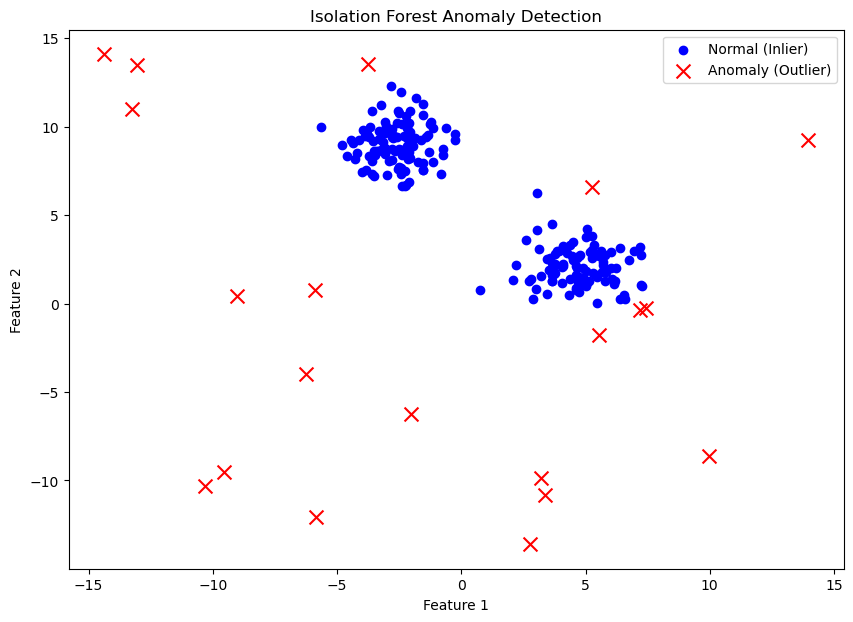

In [25]:
# Plot the results
plt.figure(figsize=(10, 7))

# Plot the inliers (normal)
inliers = df[df['anomaly_pred'] == 1]
plt.scatter(inliers['feature1'], inliers['feature2'], 
            c='blue', label='Normal (Inlier)')

# Plot the outliers (anomalies)
outliers = df[df['anomaly_pred'] == -1]
plt.scatter(outliers['feature1'], outliers['feature2'], 
            c='red', marker='x', s=100, label='Anomaly (Outlier)')

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

##### The resulting plot shows the model has successfully identified (in red) the scattered points we created, while correctly labeling the two main clusters as normal (in blue).